# "Classic" Machine learning methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (12, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cd ../..

/home/benjamin/Masterphase/Mastercode


In [99]:
from helper.helper import t_acc_plot, exclude_interval, t_std_plot

In [13]:
from helper.helper import nn_exclude_training
from Ising.Data import IsingData
data = IsingData("Ising/huge_dataset/")

Loading training data
Loading test data


## Unsupervised methods

### PCA

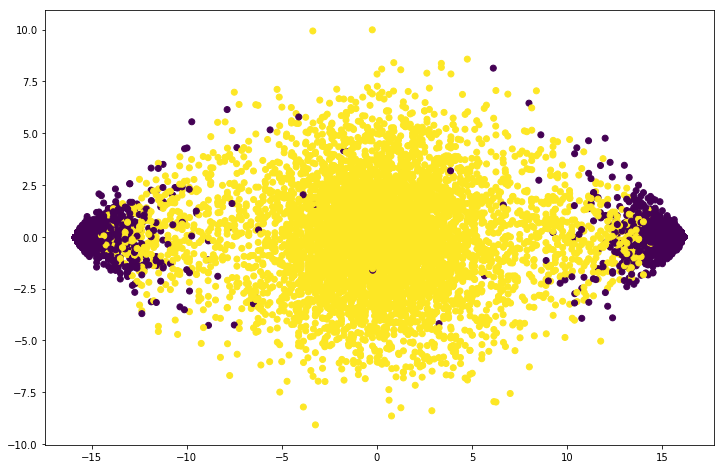

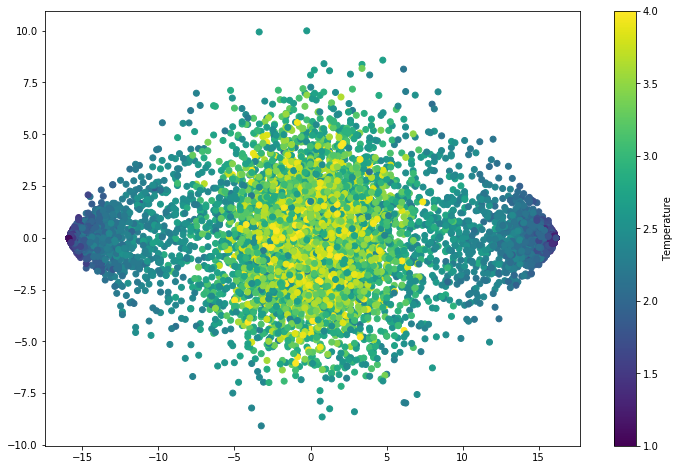

In [22]:
train = data.get_batch(10000)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train[0])
data_pca = pca.transform(train[0])

plt.scatter(data_pca[:,0], data_pca[:,1], c=np.argmax(train[1], axis=1))
plt.show()
plt.scatter(data_pca[:,0], data_pca[:,1], c=train[2])
plt.colorbar(label='Temperature')

### TSNE

PCA completed


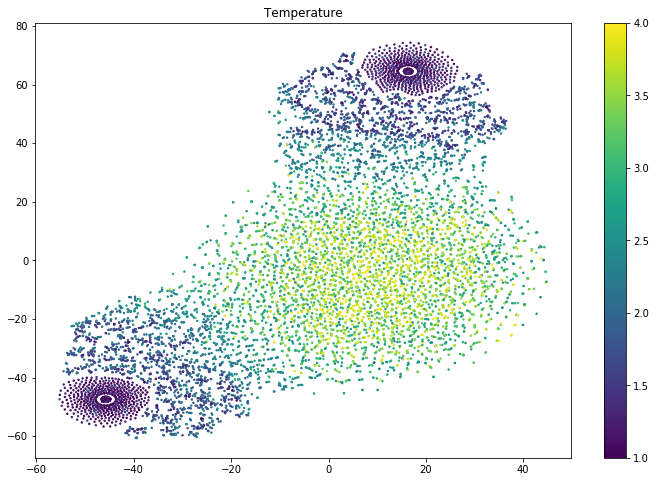

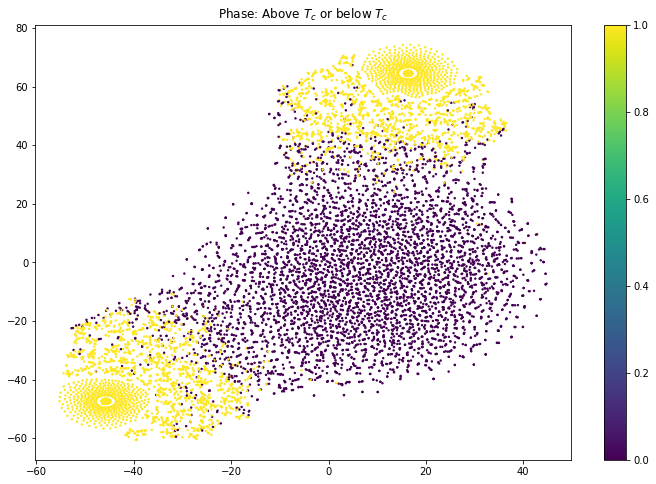

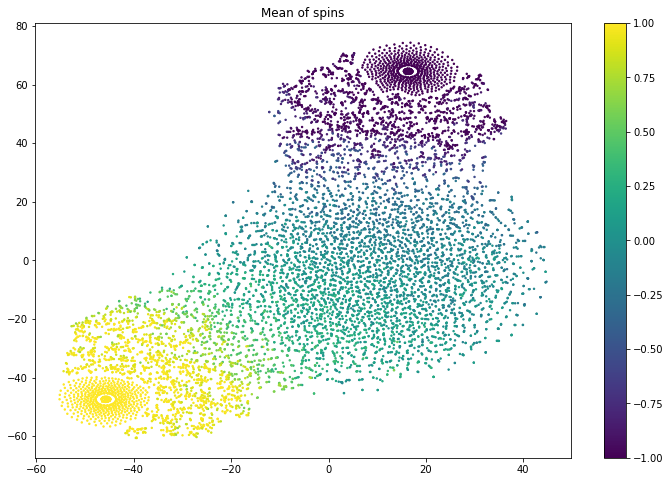

array([[  8.98520565, -28.57329178],
       [-37.69051361, -41.47701263],
       [-23.18889809, -49.13731003],
       ..., 
       [ -3.39987278,  -9.84025955],
       [  7.77093983,  42.79352188],
       [ 40.96377945,  -6.19746208]], dtype=float32)

In [23]:
from helper.helper import TSNE_plots
TSNE_plots(train)

## Supervised methods
### Nearest neighbors

In [45]:
from sklearn.neighbors import NearestNeighbors
nb = NearestNeighbors(n_neighbors=1).fit(train[0])
ind = nb.kneighbors(data.test_data[0], return_distance=False)
labels_nn = train[1][ind]

Text(0.5,1,'Nearest Neighbors - accuracy curve')

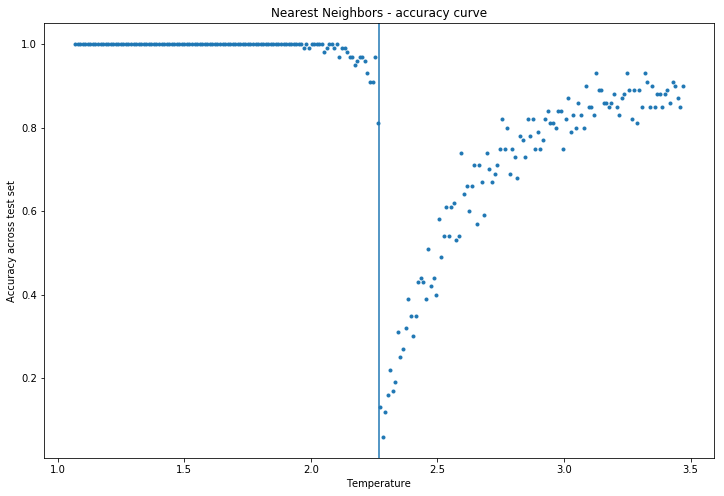

In [115]:
_=t_acc_plot(data.test_data, labels_nn)
plt.title("Nearest Neighbors - accuracy curve")

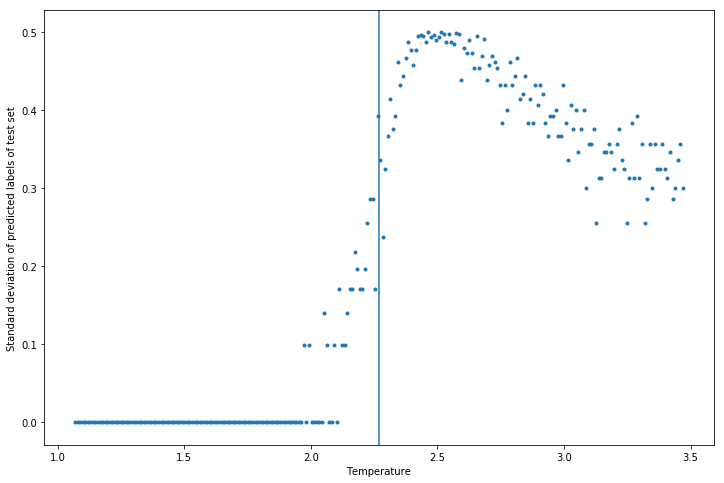

In [123]:
_=t_std_plot(data.test_data[2], labels_nn)

Text(0.5,1,'Nearest Neighbors - std curve')

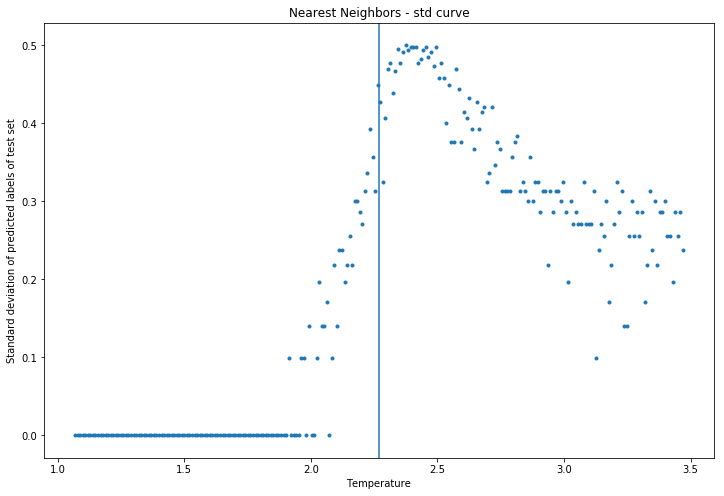

In [116]:
_=t_std_plot(data.test_data[2], labels_nn_ex)
plt.title("Nearest Neighbors - std curve")

In [117]:
exclude = (1.1, 2.2)
train_ex = exclude_interval(train, exclude)
nbex = NearestNeighbors(n_neighbors=1).fit(train_ex[0])
ind_ex = nbex.kneighbors(data.test_data[0], return_distance=False)
labels_nn_ex = train_ex[1][ind_ex]

Text(0.5,1,'Nearest Neighbors Robustness')

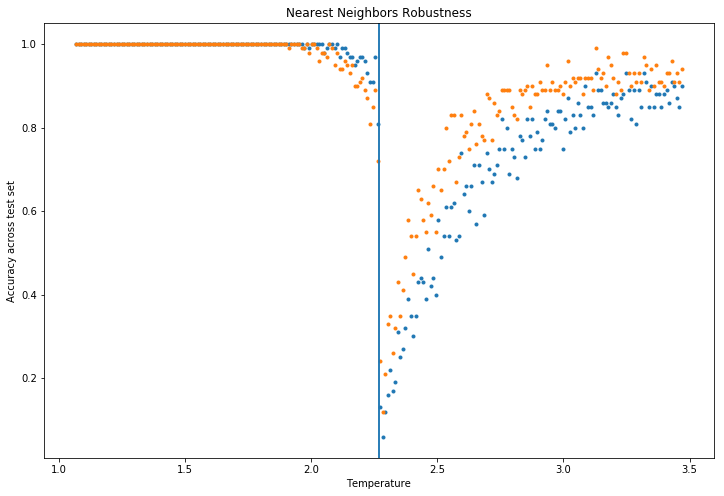

In [118]:
_=t_acc_plot(data.test_data, labels_nn)
_=t_acc_plot(data.test_data, labels_nn_ex)

plt.title("Nearest Neighbors Robustness - Accuracy curve")

Text(0.5,1,'Nearest Neighbors Robustness - std curve')

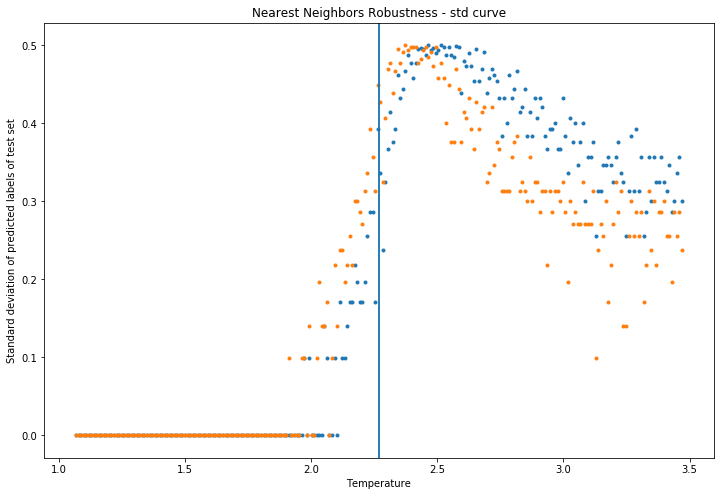

In [124]:
_=t_std_plot(data.test_data[2], labels_nn)
_=t_std_plot(data.test_data[2], labels_nn_ex)

plt.title("Nearest Neighbors Robustness - std curve")

### Logistic regression classifier

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
train = data.get_batch(10000)

In [141]:
lr.fit(train[0], np.argmax(train[1], axis=1))
labels_lr = lr.predict(data.test_data[0])

Text(0.5,1,'Logistic regression - Accuracy curve')

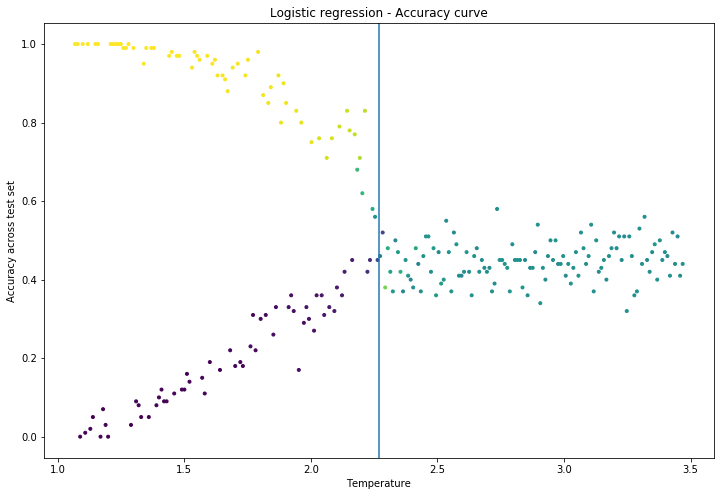

In [142]:
_=t_acc_plot(data.test_data, labels_lr, color="magnetization")
plt.title("Logistic regression - Accuracy curve")

Text(0.5,1,'Logistic regression - std curve')

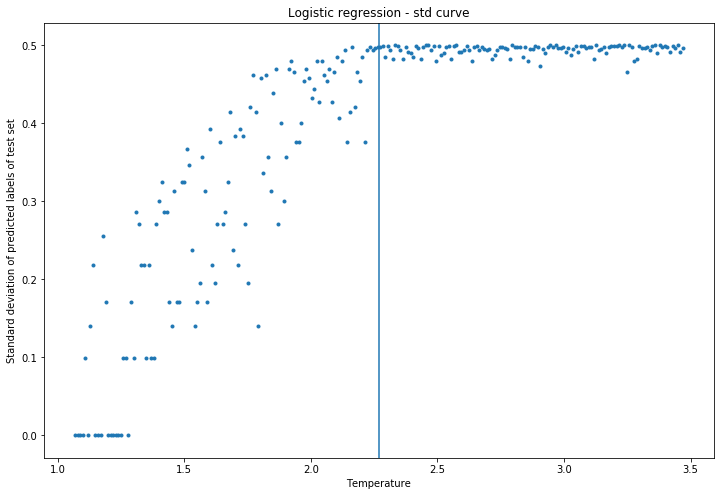

In [143]:
_=t_std_plot(data.test_data[2], labels_lr)
plt.title("Logistic regression - std curve")

In [216]:
exclude = (2.1, 2.7)
train_ex = exclude_interval(train, exclude)

lr.fit(train_ex[0], np.argmax(train_ex[1], axis=1))
labels_lr_ex = lr.predict(data.test_data[0])

Text(0.5,1,'Logistic regression - std curve')

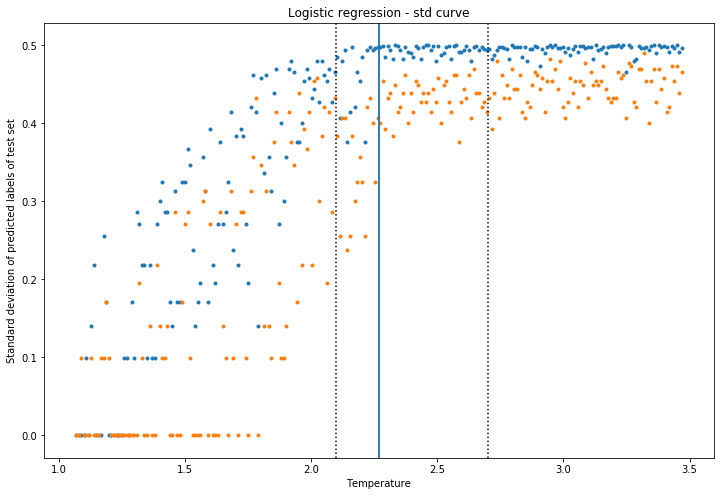

In [217]:
_=t_std_plot(data.test_data[2], labels_lr)
_=t_std_plot(data.test_data[2], labels_lr_ex)
plt.axvline(exclude[0], c='k', linestyle=':')
plt.axvline(exclude[1], c='k', linestyle=':')
plt.title("Logistic regression - std curve")

### Support Vector machines

In [156]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(train[0], np.argmax(train[1], axis=1))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [157]:
labels_lsvm = clf.predict(data.test_data[0])

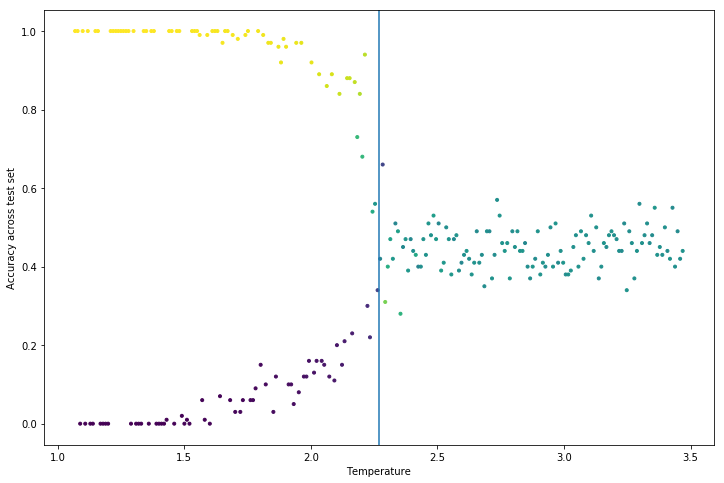

In [162]:
_=t_acc_plot(data.test_data, labels_lsvm, color="magnetization")

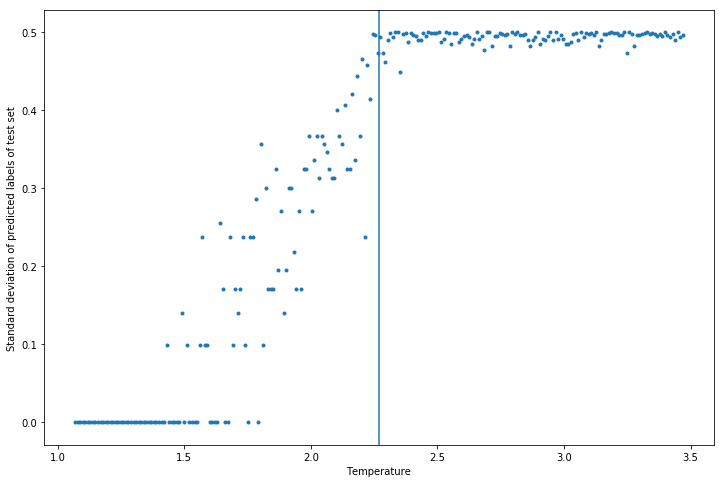

In [161]:
_=t_std_plot(data.test_data[2], labels_lsvm)

In [212]:
exclude = (2.2, 2.4)
train_ex = exclude_interval(train, exclude)

clf_ex = svm.LinearSVC()
clf_ex.fit(train_ex[0], np.argmax(train_ex[1], axis=1))

labels_lsvm_ex = clf_ex.predict(data.test_data[0])

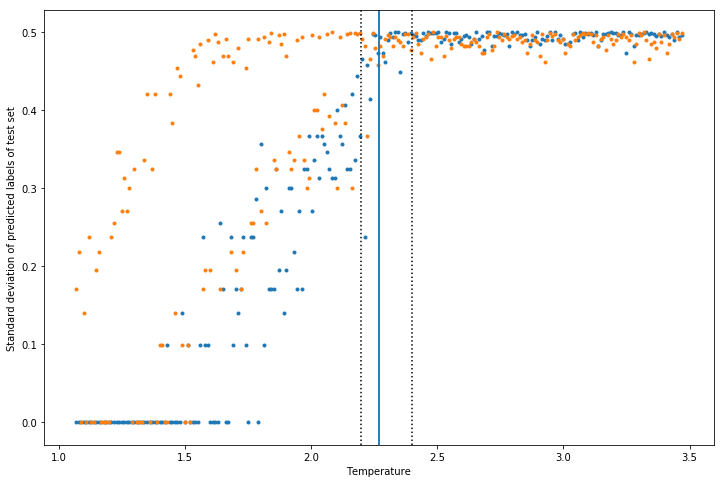

In [213]:
_=t_std_plot(data.test_data[2], labels_lsvm)
_=t_std_plot(data.test_data[2], labels_lsvm_ex)

plt.axvline(exclude[0], c='k', linestyle=':')
plt.axvline(exclude[1], c='k', linestyle=':')

### Decision Trees

In [176]:
from sklearn import tree
tree_c = tree.DecisionTreeClassifier()
tree_c.fit(train[0], np.argmax(train[1], axis=1))

labels_tree = tree_c.predict(data.test_data[0])

In [222]:
exclude = (2.0, 3)
train_ex = exclude_interval(train, exclude)

tree_c_ex = tree.DecisionTreeClassifier()
tree_c_ex.fit(train_ex[0], np.argmax(train_ex[1], axis=1))

labels_tree_ex = tree_c_ex.predict(data.test_data[0])

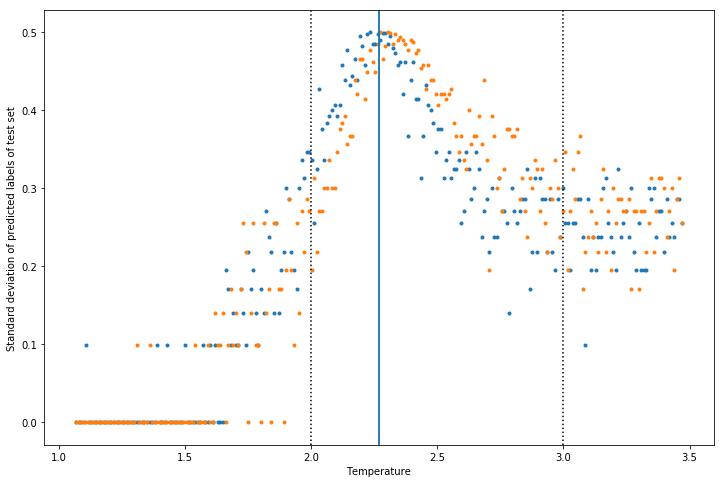

In [223]:
_=t_std_plot(data.test_data[2], labels_tree)
_=t_std_plot(data.test_data[2], labels_tree_ex)

plt.axvline(exclude[0], c='k', linestyle=':')
plt.axvline(exclude[1], c='k', linestyle=':')

Conclusion: Nearest Neighbors, support Vector Machines, Decision Trees an a Logistic Regression classifier give a rough indication of the phase transition, but are not very robust against excluding training data.

Among these, decision trees offer the most robust and accurate description of $T_c$. They do suffer from a significant bias when the exclude interval is assymetric.